#### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
df = pd.read_csv('Datasets/Wine_data.csv')

#### Performing EDA

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#there is categorical variables here
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [6]:
#multi class classification problem
df.Class.unique()

array([0, 1, 2], dtype=int64)

In [7]:
### there in missing values
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

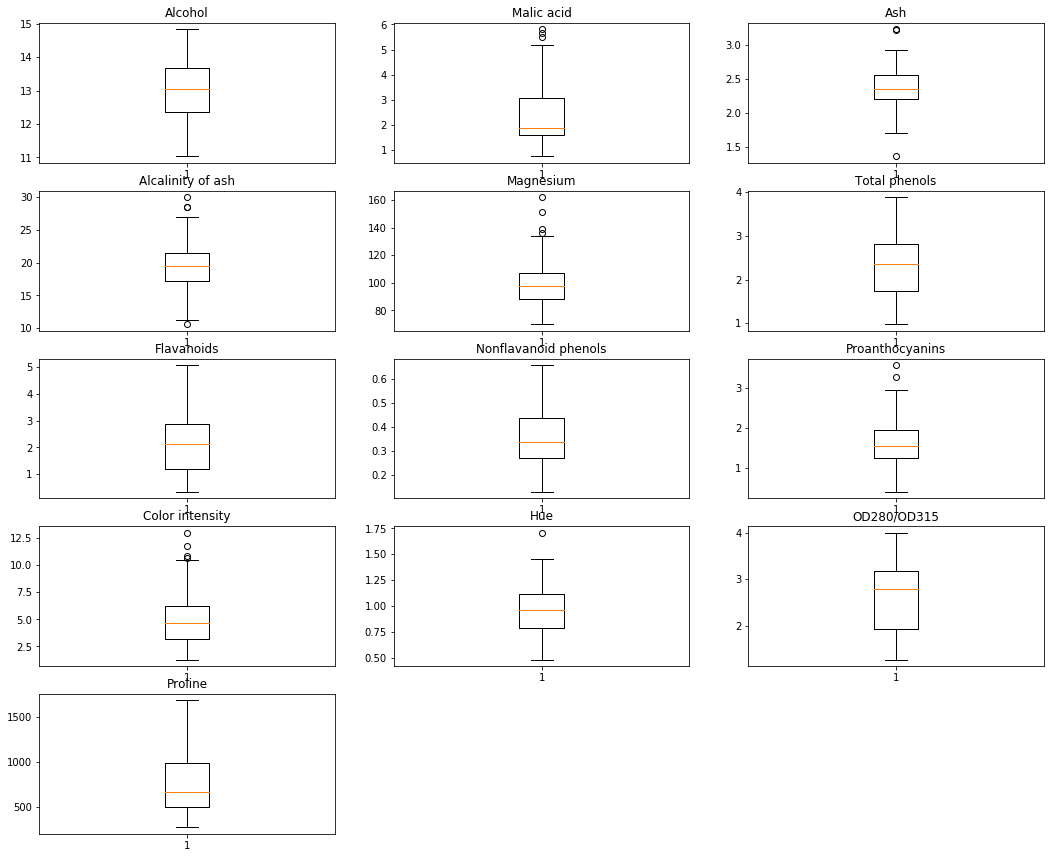

In [8]:
# detecting outliers
def detect_outliers():
    count = 1
    plt.figure(figsize = (18,18))
    for col in df.columns[1:]:
        plt.subplot(6,3,count)
        plt.boxplot(df[col])
        plt.title(col)
        count += 1

    plt.show()
detect_outliers()

In [9]:
df.shape

(178, 14)

In [10]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for col in df.columns:
    df = remove_outlier(df,col)

In [11]:
#After removing outliers
df.shape

(161, 14)

In [12]:
#seperating X and y
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [13]:
#splitting in training and testing values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#### Model Building

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [15]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#predictions
y_pred = model.predict(X_test)

#### Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf = confusion_matrix(y_test,y_pred)
cf

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  8]], dtype=int64)

In [18]:
accuracy_score(y_test,y_pred)

0.9393939393939394